In [8]:
import os

import pandas as pd

from scripts.plot_performances import plot_performance_ranges, plot_molformer_by_size, plot_chemberta_2, \
    plot_performance_by_representation_or_objectives


In [9]:
def generate_figure_2_and_supp_figure_7():
    data_path = os.path.join('data', 'performance_comparison')
    transformers_dict = {}
    ml_dict_comparable = {}
    dl_dict_comparable = {}
    ml_dict_all = {}
    dl_dict_all = {}
    for to_classify in [True, False]:
        if to_classify:
            suffix = "classification"
        else:
            suffix = "regression"

        transformers_performance = pd.read_csv(os.path.join(data_path, f'transformers_{suffix}.csv'), index_col=0)
        transformers_dict[suffix] = transformers_performance

        ml_performance = pd.read_csv(os.path.join(data_path, f'ml_{suffix}.csv'), index_col=0)
        dl_performance = pd.read_csv(os.path.join(data_path, f'dl_{suffix}.csv'), index_col=0)

        # The ml/dl models are copied from the transformer articles. Therefore, the first col corresponds to the
        # transformer model name and the second col corresponds to the ml/dl model name. In the below lines,
        # we concatenate the two cols to avoid duplicated indices when plotting
        ml_performance.index = ml_performance.index + '_' + ml_performance.iloc[:, 0]
        dl_performance.index = dl_performance.index + '_' + dl_performance.iloc[:, 0]

        # data for figure 2
        ml_performance_comparable = (ml_performance[ml_performance['reporting'] != 'copied']
                                     .drop([ml_performance.columns[0], 'reporting'], axis=1))
        dl_performance_comparable = (dl_performance[dl_performance['reporting'] != 'copied']
                                     .drop([dl_performance.columns[0], 'reporting'], axis=1))

        ml_dict_comparable[suffix] = ml_performance_comparable
        dl_dict_comparable[suffix] = dl_performance_comparable



        # data for supplementary figure 7
        ml_performance_all = (ml_performance.drop([ml_performance.columns[0], 'reporting'], axis=1))
        dl_performance_all = (dl_performance.drop([dl_performance.columns[0], 'reporting'], axis=1))

        ml_dict_all[suffix] = ml_performance_all
        dl_dict_all[suffix] = dl_performance_all

    # Plot figure 2
    plot_performance_ranges(transformers_dict, ml_dict_comparable, dl_dict_comparable, data_path, comparable_only=True)

    # Plot supplementary figure 7
    plot_performance_ranges(transformers_dict, ml_dict_all, dl_dict_all, data_path, comparable_only=False)
    return data_path

Figure 2:


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Supplementary Figure 7:


'data/performance_comparison'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


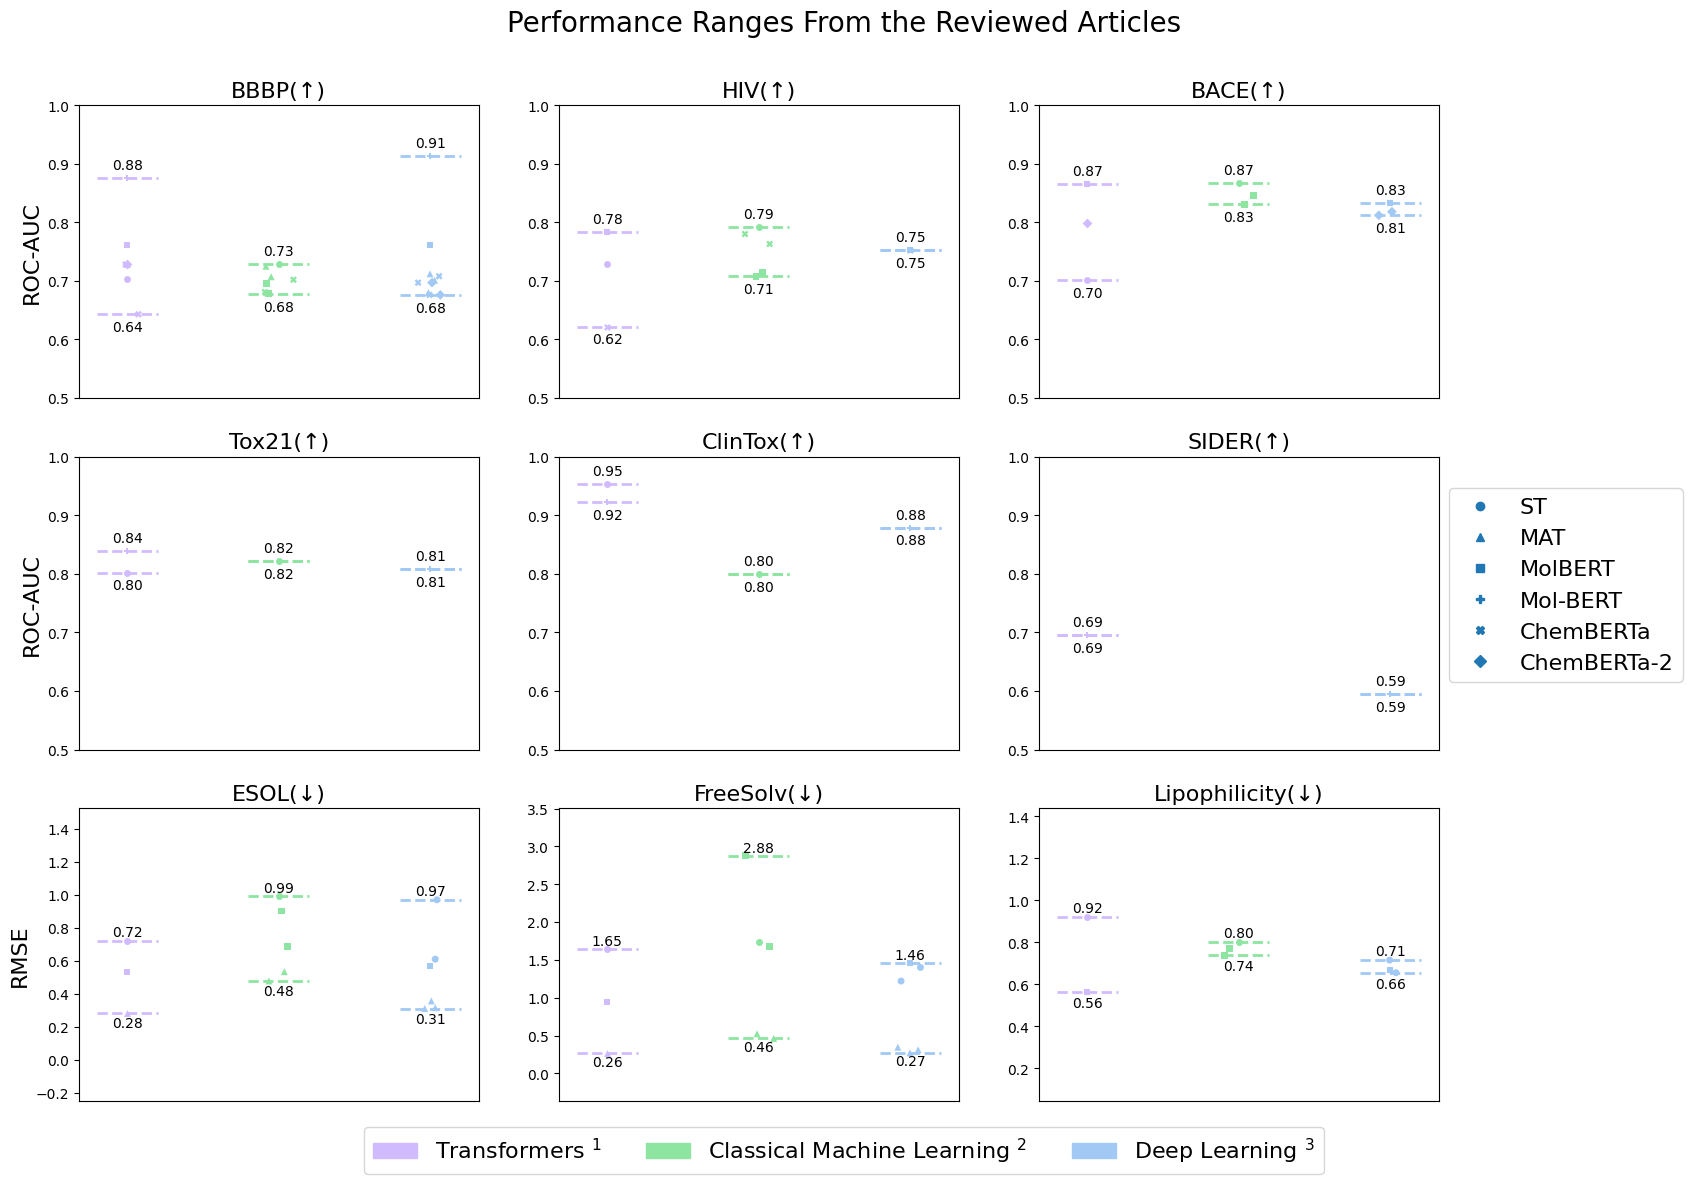

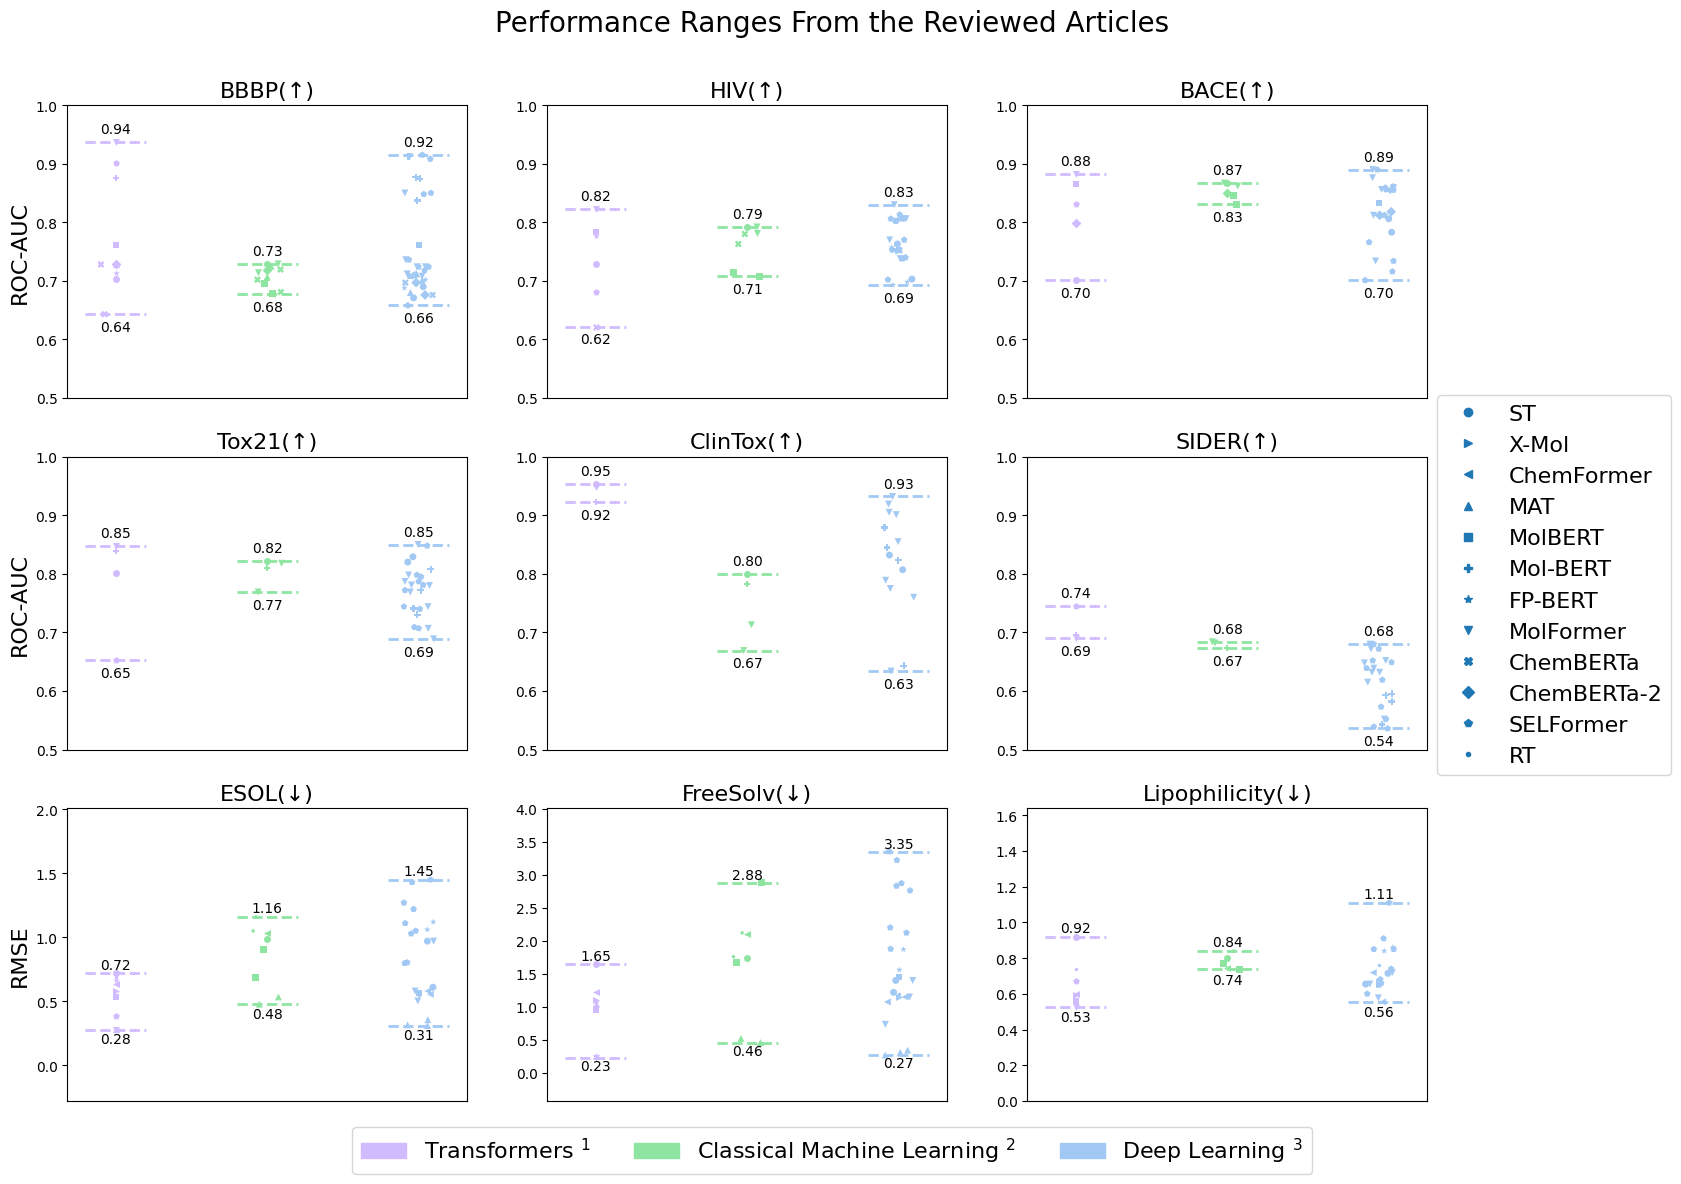

In [10]:
generate_figure_2_and_supp_figure_7()

In [11]:
def generate_figure_4():
    """
    This figure is generated by concatenating the below two figures in keynote.
    :return:
    """
    data_path = os.path.join('data', 'pretrain_dataset_size')
    plot_molformer_by_size(data_path)
    plot_chemberta_2(data_path)
    return data_path

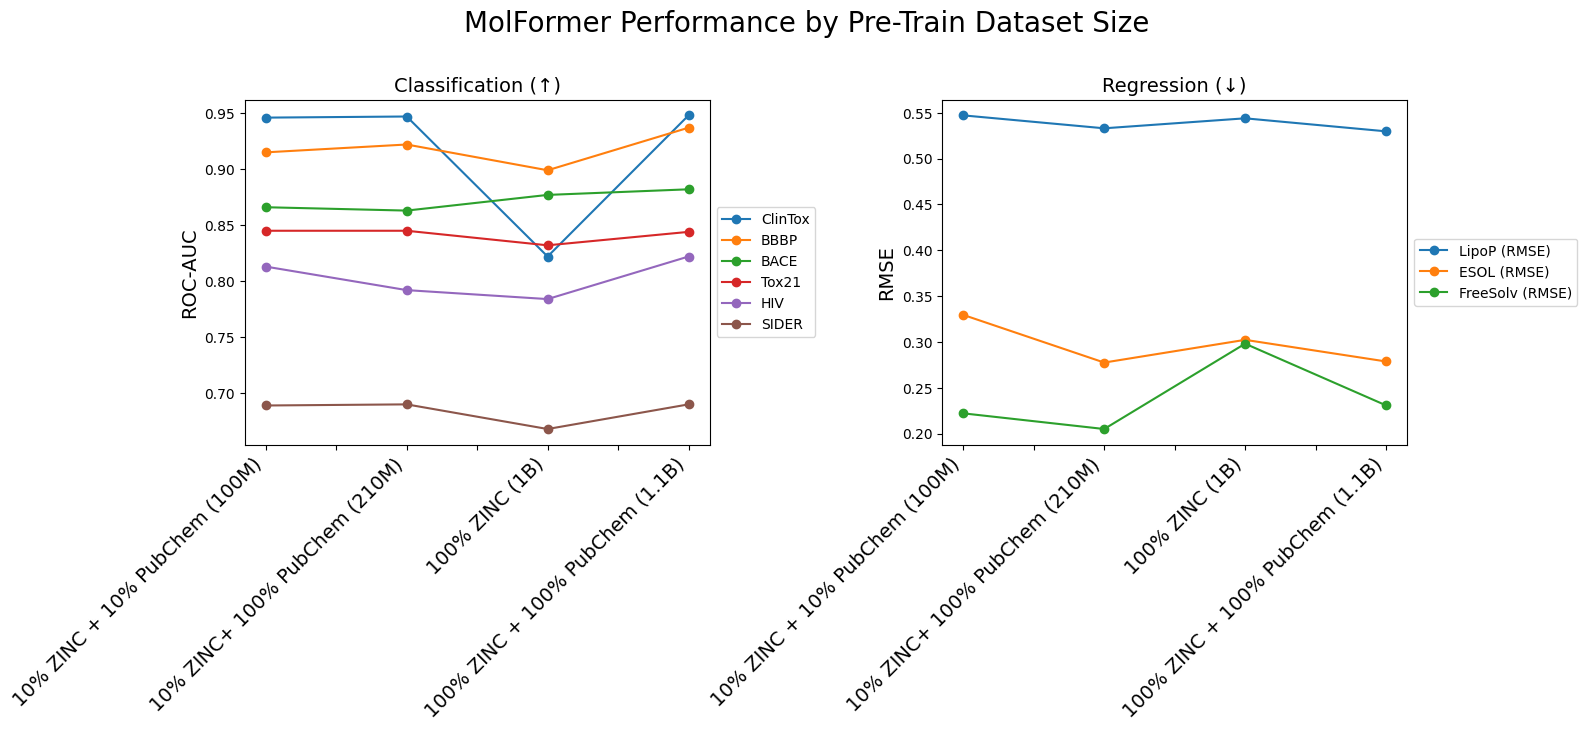

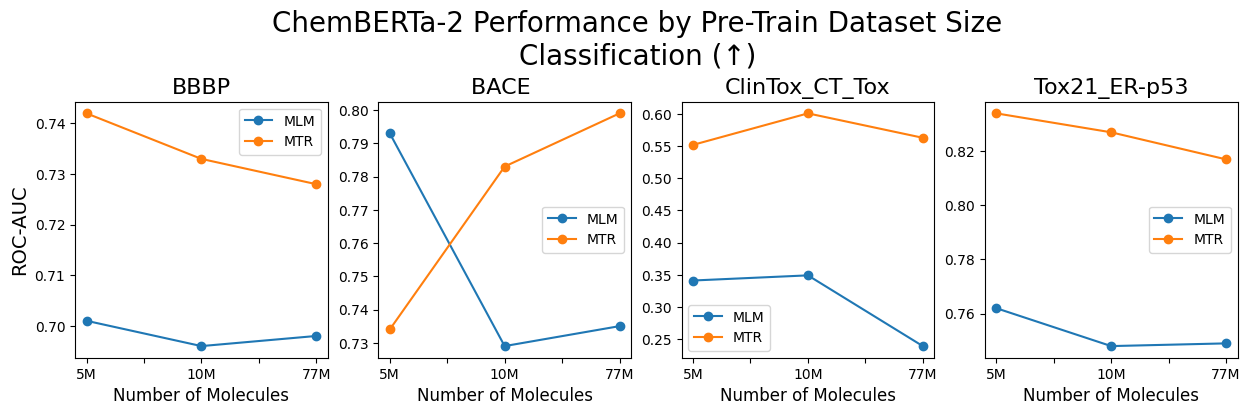

'data/pretrain_dataset_size'

In [12]:
generate_figure_4()

In [13]:
def generate_figure_5():
    """
       This figure is generated by concatenating the below two figures in keynote.
       :return:
       """
    data_path = os.path.join('data', 'representation')
    plot_performance_by_representation_or_objectives(data_path, mol_bert=True, objectives=False)
    plot_performance_by_representation_or_objectives(data_path, mat=True, objectives=False)
    return data_path

'data/representation'

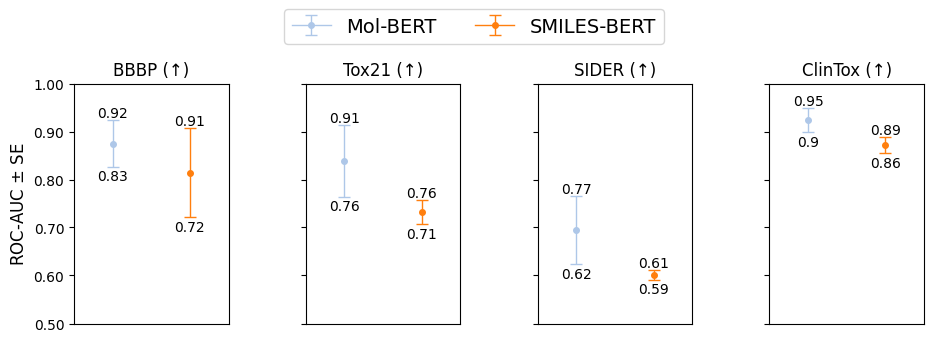

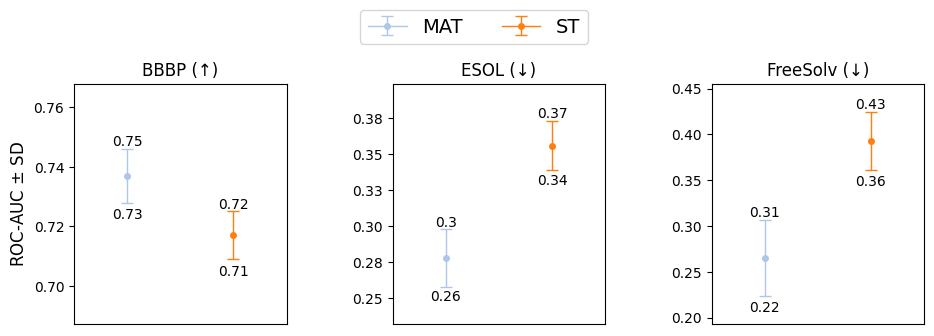

In [14]:
generate_figure_5()

In [15]:
def generate_figure_6_and_supp_figures_8_n_9():
    data_path = os.path.join('data', 'objectives')

    plot_performance_by_representation_or_objectives(data_path, mat=True, objectives=True)
    plot_performance_by_representation_or_objectives(data_path, molbert=True, objectives=True)
    plot_performance_by_representation_or_objectives(data_path, k_bert=True, objectives=True)
    return data_path

'data/objectives'

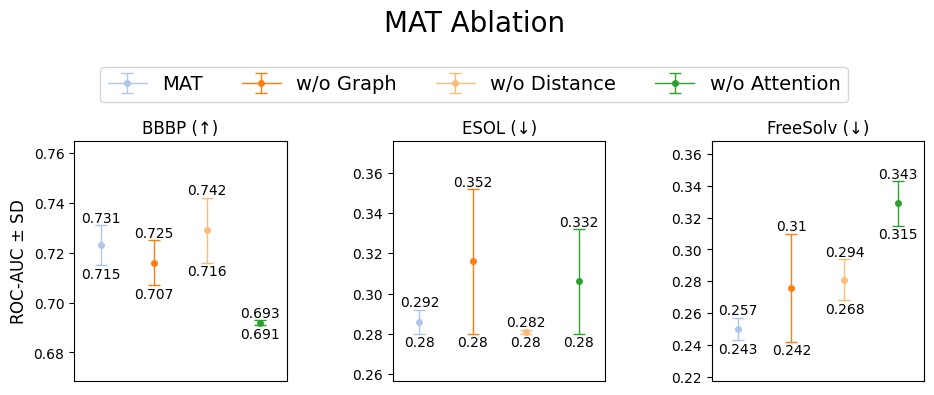

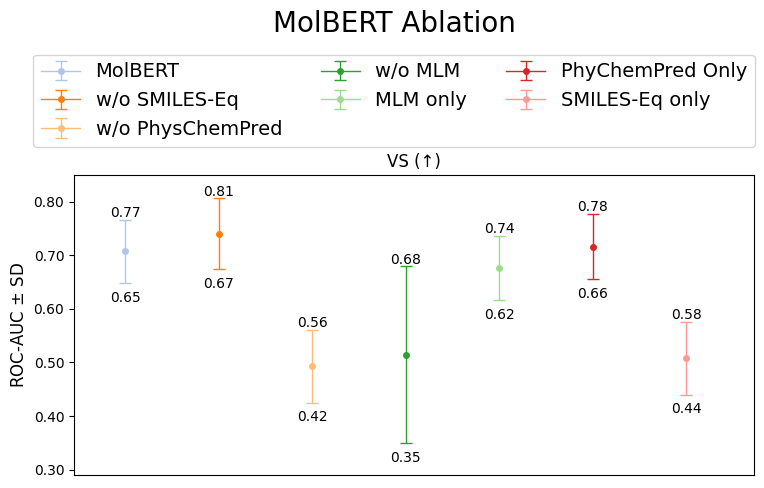

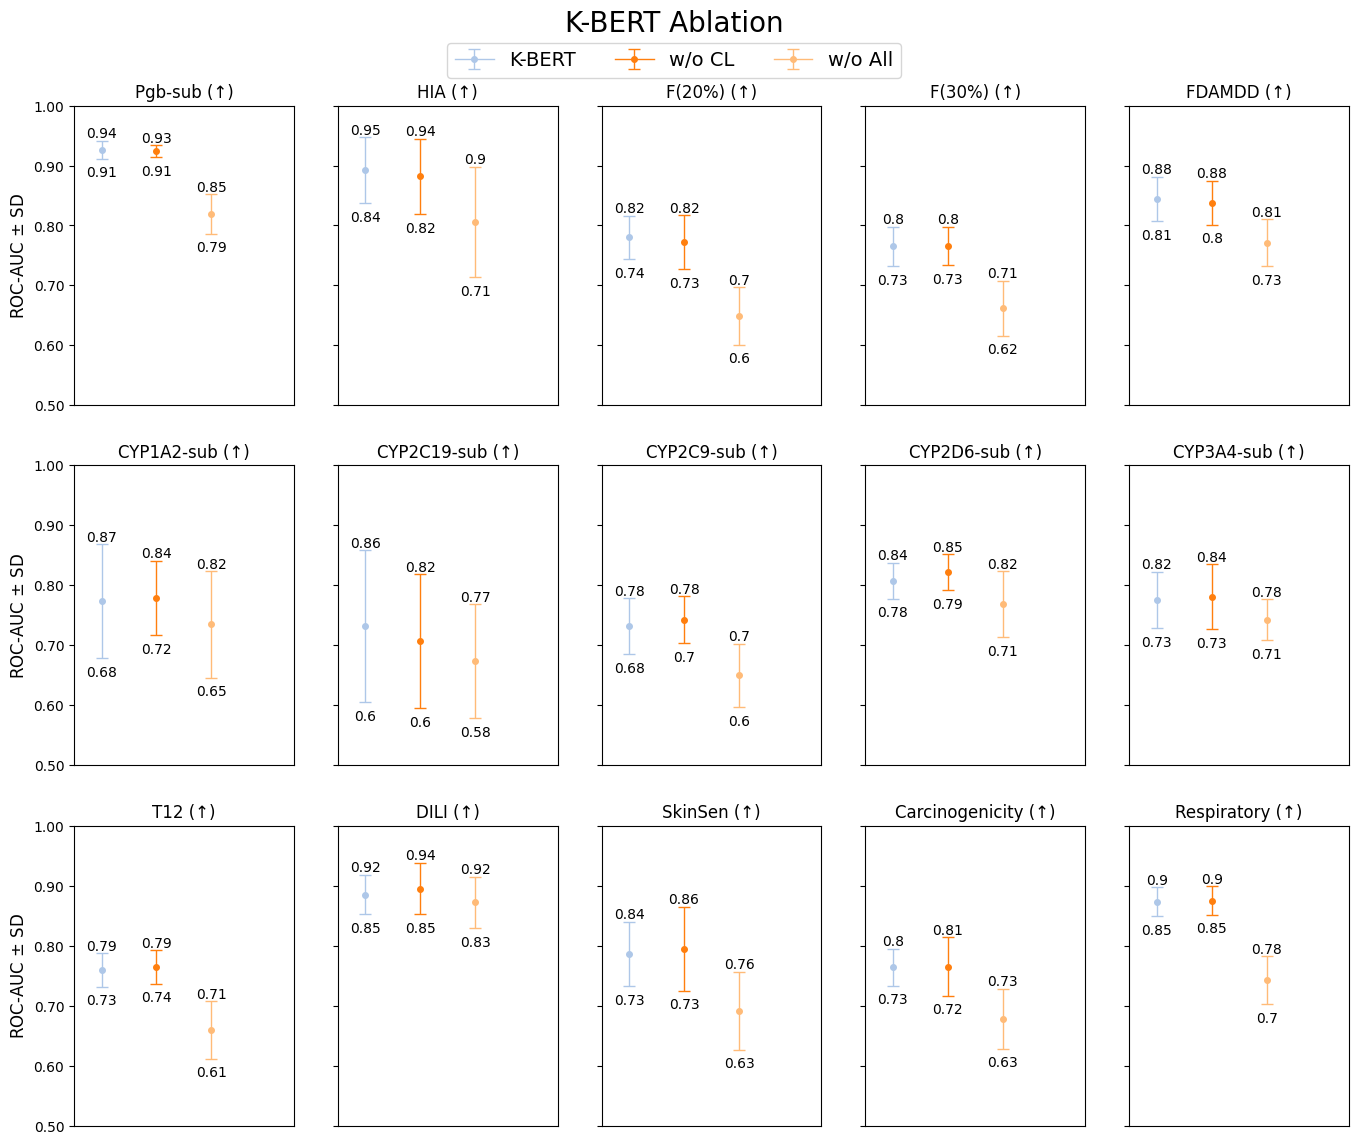

In [16]:
generate_figure_6_and_supp_figures_8_n_9()